 If a better in-flight entertainment experience leads to higher customer satisfaction.

Effective bionomial logistic regression

# Imports

In [98]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns




In [99]:
df_original = pd.read_csv(r"airline.csv")

In [100]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


# EDA

In [101]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [102]:
df_original["satisfaction"].value_counts(dropna=False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [103]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [104]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

In [105]:
df_subset = df_subset.astype({"Inflight entertainment": float})

In [106]:
df_subset["satisfaction"] = OneHotEncoder(drop="first").fit_transform(df_subset[["satisfaction"]]).toarray()

In [107]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [108]:
df_subset["Inflight entertainment"].head()

0    4.0
1    2.0
2    0.0
3    4.0
4    3.0
Name: Inflight entertainment, dtype: float64

In [109]:
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Model building

In [110]:
df_subset.columns = df_subset.columns.str.replace(' ', '_')

In [111]:
ols_data = df_subset[["Inflight_entertainment", "satisfaction"]]

In [112]:
ols_formula = "satisfaction ~ Inflight_entertainment"

In [113]:
ols_data.head()

,Inflight_entertainment,satisfaction
0,4.0,1.0
1,2.0,1.0
2,0.0,1.0
3,4.0,1.0
4,3.0,1.0


In [114]:
from statsmodels.formula.api import ols

In [115]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           satisfaction   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                 4.885e+04
Date:                Sat, 17 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:18:13   Log-Likelihood:                -72673.
No. Observations:              129487   AIC:                         1.453e+05
Df Residuals:                  129485   BIC:                         1.454e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.1075      0.003    -33.710      0.000      -0.114      -0.101
Inflight_entertainment     0.1935      0.001    221.013      0.000       0.192       0.195
==============================================================================
Omnibus:                     2688.372   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1537.833
Skew:                           0.091   Prob(JB):                         0.00
Kurtosis:                       2.498   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
clf = LogisticRegression().fit(X_train,y_train)

In [117]:
clf.coef_

array([[0.99752883]])

In [118]:
clf.intercept_

array([-3.19359054])

Optimization terminated successfully.
         Current function value: 0.535888
         Iterations 6


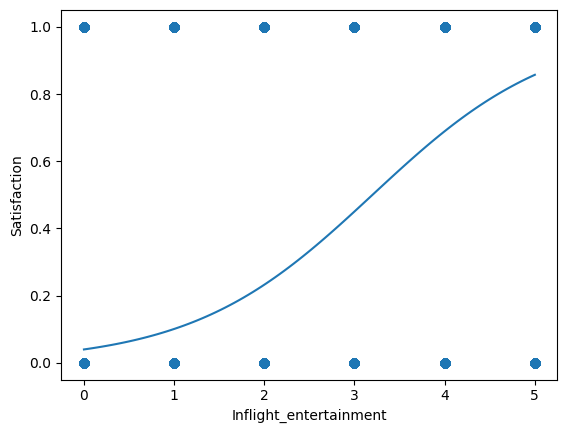

In [120]:
import statsmodels.api as sm

df_subset['satisfaction'] = df_subset['satisfaction'].astype(int)

X = sm.add_constant(df_subset['Inflight_entertainment'])
y = df_subset['satisfaction']

model = sm.Logit(y, X).fit()

plt.scatter(df_subset['Inflight_entertainment'], df_subset['satisfaction'])

x_values = np.linspace(df_subset['Inflight_entertainment'].min(), df_subset['Inflight_entertainment'].max(), 100)
y_predicted = model.predict(sm.add_constant(x_values))
plt.plot(x_values, y_predicted)

plt.xlabel('Inflight_entertainment')
plt.ylabel('Satisfaction')
plt.show()

# Results and Evaluation

In [121]:
y_pred = clf.predict(X_test)

In [122]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [123]:
clf.predict_proba(X_test)

array([[0.14257646, 0.85742354],
       [0.55008251, 0.44991749],
       [0.89989529, 0.10010471],
       ...,
       [0.89989529, 0.10010471],
       [0.76826369, 0.23173631],
       [0.55008251, 0.44991749]])

In [124]:
clf.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [125]:
print("accuarcy:", "%.6f" % metrics.accuracy_score(y_test,y_pred))
print("precision:", "%.6f" % metrics.precision_score(y_test,y_pred))
print("recall:", "%.6f" % metrics.recall_score(y_test,y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test,y_pred))

accuarcy: 0.801529
precision: 0.816142
recall: 0.821530
F1 Score: 0.818827


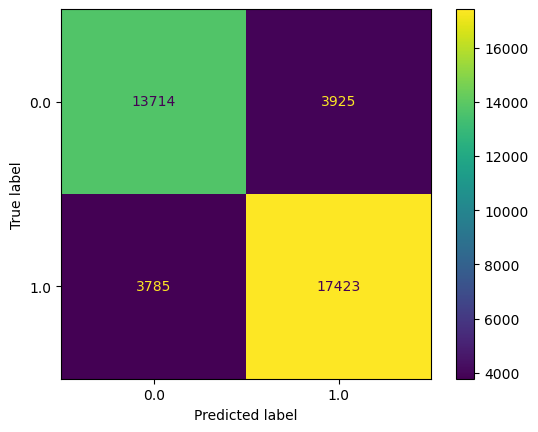

In [126]:
cm = metrics.confusion_matrix (y_test,y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay (confusion_matrix = cm, display_labels= clf.classes_)
disp.plot()